In [16]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utilssphering

In [3]:
# Read CSVs

match_rep_df = pd.read_csv("checkpoints/match_rep_df.csv")
match_rep_df

,Unnamed: 0.1,Vendor,Batch,Assay_Plate_Barcode,sphering,value_95_replicating,Percent_Replicating,Plate_Map_Name,Modality,Images_per_well,...,aperture,dry-immersion,vs-brightfield,simultaneous-excitation,sites,Percent_Matching,value_95_matching,cell_count,Size_MB,Size_MB_std
0,0,MolDev,1siteSubSample_Scope1_MolDev_10X,Plate2_PCO_6ch_4site_10XPA,True,0.134280,47.777778,JUMP-MOA_compound_platemap,Confocal,4,...,NaN,NaN,NaN,NaN,1,18.604651,0.172572,511430,52.476334,0.000144
1,1,MolDev,1siteSubSample_Scope1_MolDev_10X,Plate2_PCO_6ch_4site_10XPA,False,0.389306,17.777778,JUMP-MOA_compound_platemap,Confocal,4,...,NaN,NaN,NaN,NaN,1,9.302326,0.232432,511430,52.476334,0.000144
2,2,MolDev,1siteSubSample_Scope1_MolDev_10X,Plate3_PCO_6ch_4site_10XPA_Crest,True,0.172727,56.666667,JUMP-MOA_compound_platemap,Confocal,4,...,NaN,NaN,NaN,NaN,1,18.604651,0.244286,617546,52.476514,0.000183
3,3,MolDev,1siteSubSample_Scope1_MolDev_10X,Plate3_PCO_6ch_4site_10XPA_Crest,False,0.486376,23.333333,JUMP-MOA_compound_platemap,Confocal,4,...,NaN,NaN,NaN,NaN,1,13.953488,0.359418,617546,52.476514,0.000183
4,4,MolDev,1siteSubSample_Scope1_MolDev_10X_4siteZ,Plate3_PCO_6ch_4site_10XPA_Crestz,True,0.171848,62.222222,JUMP-MOA_compound_platemap,Confocal,4,...,NaN,NaN,NaN,NaN,1,20.930233,0.276754,608864,52.476631,0.000142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,357,Yokogawa_US,Scope1_Yokogawa_US_20X_6Ch_BRO0117059,BRO0117059_20X,False,0.445621,58.888889,JUMP-MOA_compound_platemap,Confocal,9,...,1.0,water,yes,4.0,9,18.604651,0.519666,1136319,7.954439,0.000583
354,358,Yokogawa_US,Scope1_Yokogawa_US_20X_6Ch_BRO01177034,BRO01177034_20x,True,0.214643,60.000000,JUMP-MOA_compound_platemap,Confocal,9,...,1.0,water,yes,1.0,9,25.581395,0.324134,1045379,8.003584,0.000014
355,359,Yokogawa_US,Scope1_Yokogawa_US_20X_6Ch_BRO01177034,BRO01177034_20x,False,0.295594,52.222222,JUMP-MOA_compound_platemap,Confocal,9,...,1.0,water,yes,1.0,9,20.930233,0.368823,1045379,8.003584,0.000014
356,360,Yokogawa_US,Scope1_Yokogawa_US_40X_BRO0117059,BRO0117059_40x,True,0.190698,57.777778,JUMP-MOA_compound_platemap,Confocal,9,...,1.0,water,yes,4.0,9,20.930233,0.265621,279900,7.971628,0.080201


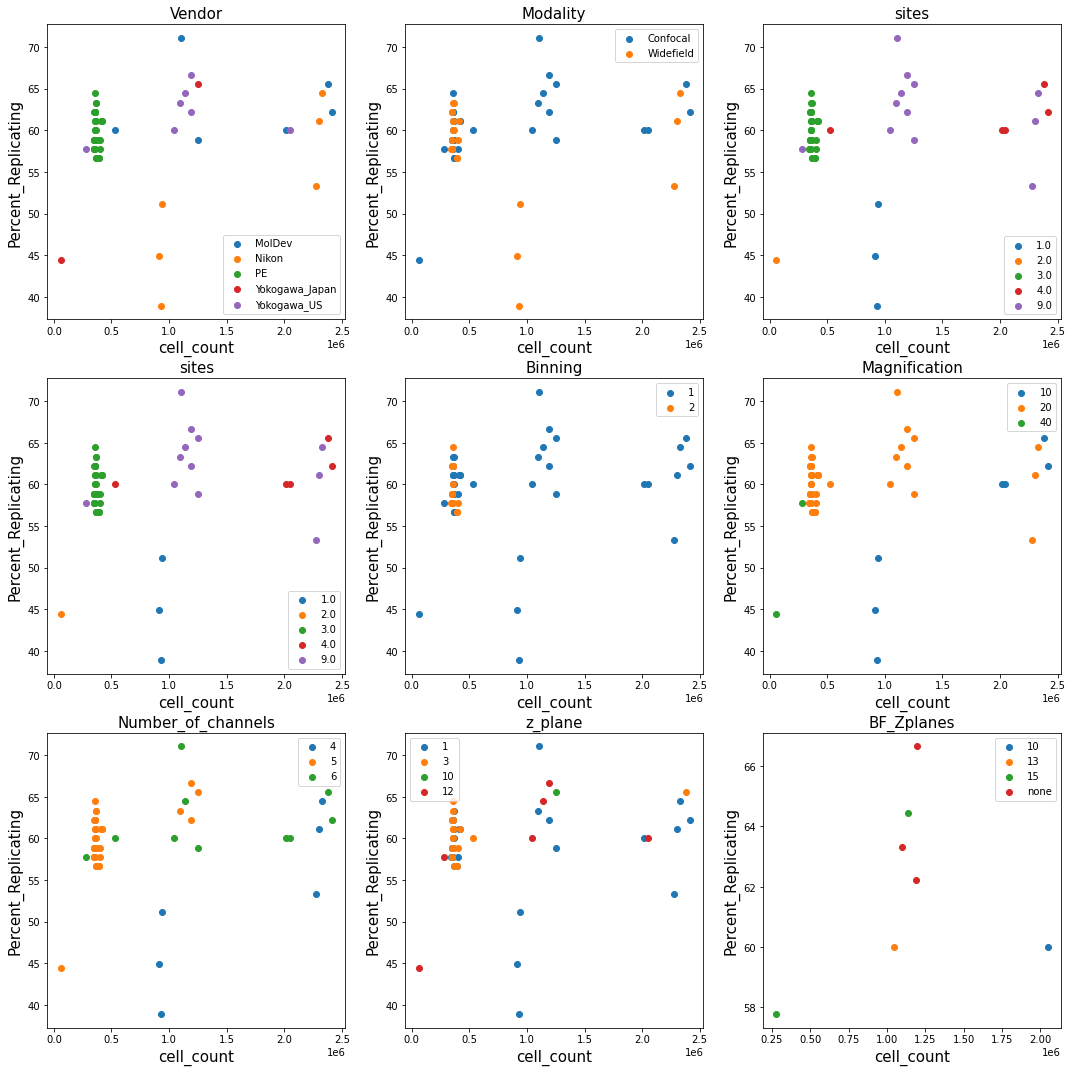

In [123]:
group_columns = ["Vendor", "Modality", "sites", "sites", 
                "Binning", "Magnification", "Number_of_channels", "z_plane", 
                "BF_Zplanes"]
subplots = np.arange(len(group_columns)).reshape(-1,3).shape

df_subset = match_rep_df[(~match_rep_df["Batch"].str.contains("siteSubSample")) & (match_rep_df["sphering"] == True)]
fig, ax = plt.subplots(subplots[0], subplots[1], figsize=(15,15))
for i, _ax in zip(group_columns, ax.flatten()):
    utilssphering.group_plot(df_subset, "cell_count", "Percent_Replicating", group=i, fig=fig, ax_=_ax)
fig.savefig("figures/rep_vs_cell-count_sphering_TRUE.png")

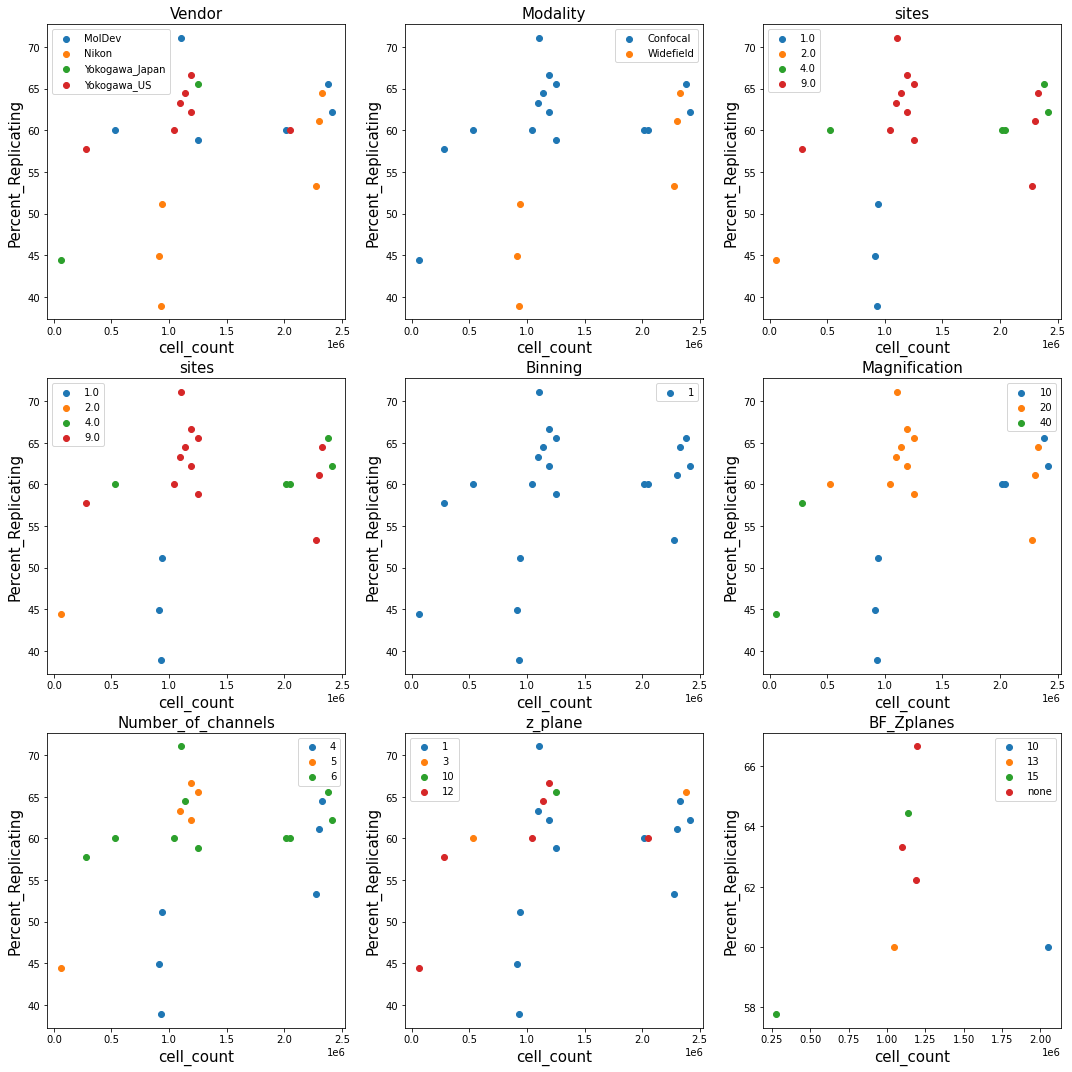

In [122]:
group_columns = ["Vendor", "Modality", "sites", "sites", 
                "Binning", "Magnification", "Number_of_channels", "z_plane", 
                "BF_Zplanes"]
subplots = np.arange(len(group_columns)).reshape(-1,3).shape

df_subset = match_rep_df[(~match_rep_df["Batch"].str.contains("siteSubSample")) & (match_rep_df["sphering"] == True) & (~match_rep_df["Vendor"].str.contains("PE"))]

fig, ax = plt.subplots(subplots[0], subplots[1], figsize=(15,15))
for i, _ax in zip(group_columns, ax.flatten()):
    utilssphering.group_plot(df_subset, "cell_count", "Percent_Replicating", group=i, fig=fig, ax_=_ax)
fig.savefig("figures/rep_vs_cell-count_sphering_TRUE_NO_PE.png")


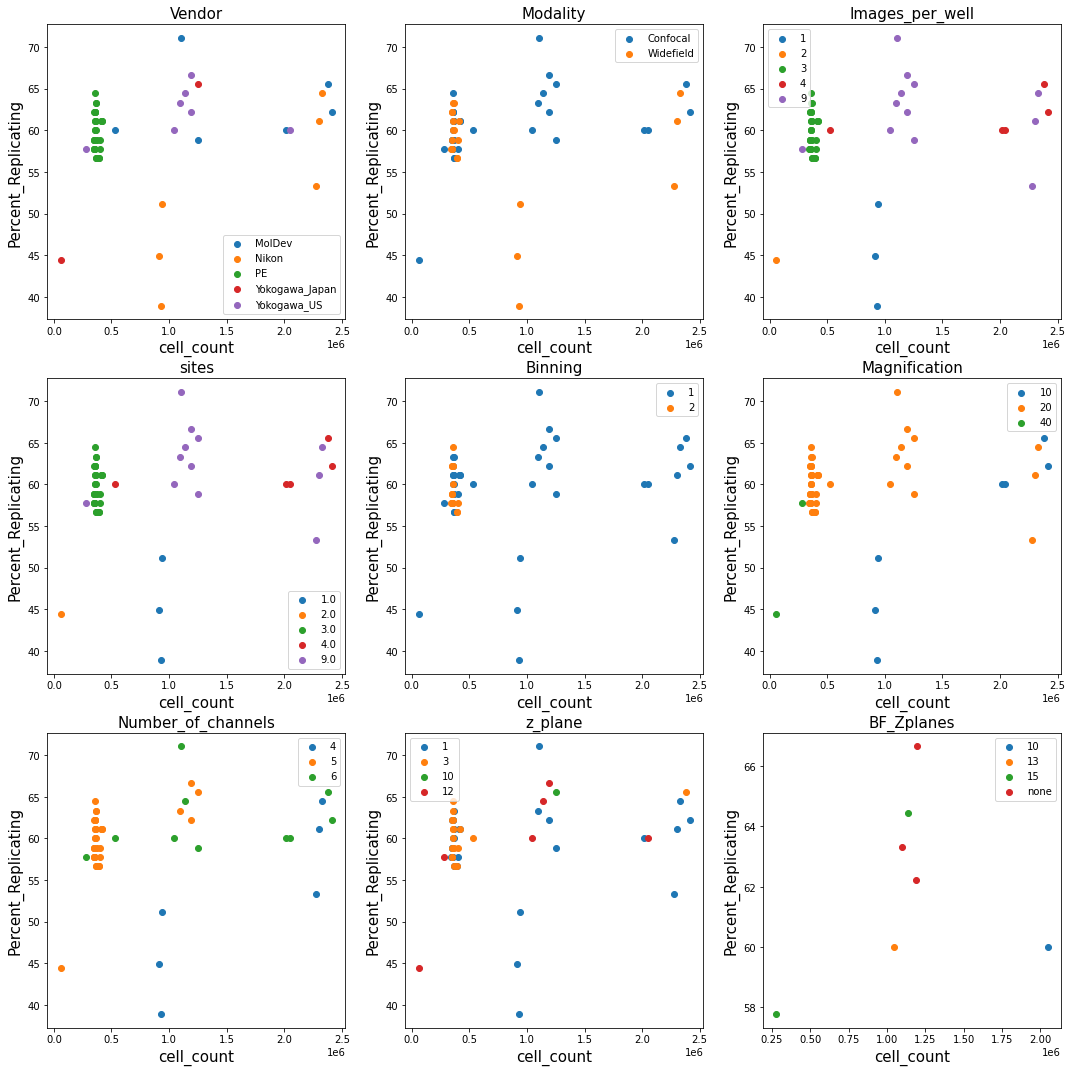

In [62]:
group_columns = ["Vendor", "Modality", "Images_per_well", "sites", 
                "Binning", "Magnification", "Number_of_channels", "z_plane", 
                "BF_Zplanes"]
subplots = np.arange(len(group_columns)).reshape(-1,3).shape

df_subset = match_rep_df[(~match_rep_df["Batch"].str.contains("siteSubSample")) & (match_rep_df["sphering"] == True)]

fig, ax = plt.subplots(subplots[0], subplots[1], figsize=(15,15))
for i, _ax in zip(group_columns, ax.flatten()):
    utilssphering.group_plot(df_subset, "cell_count", "Percent_Replicating", group=i, fig=fig, ax_=_ax, legend=True)
# fig.savefig("figures/rep_vs_cell-count_sphering_FALSE.png")


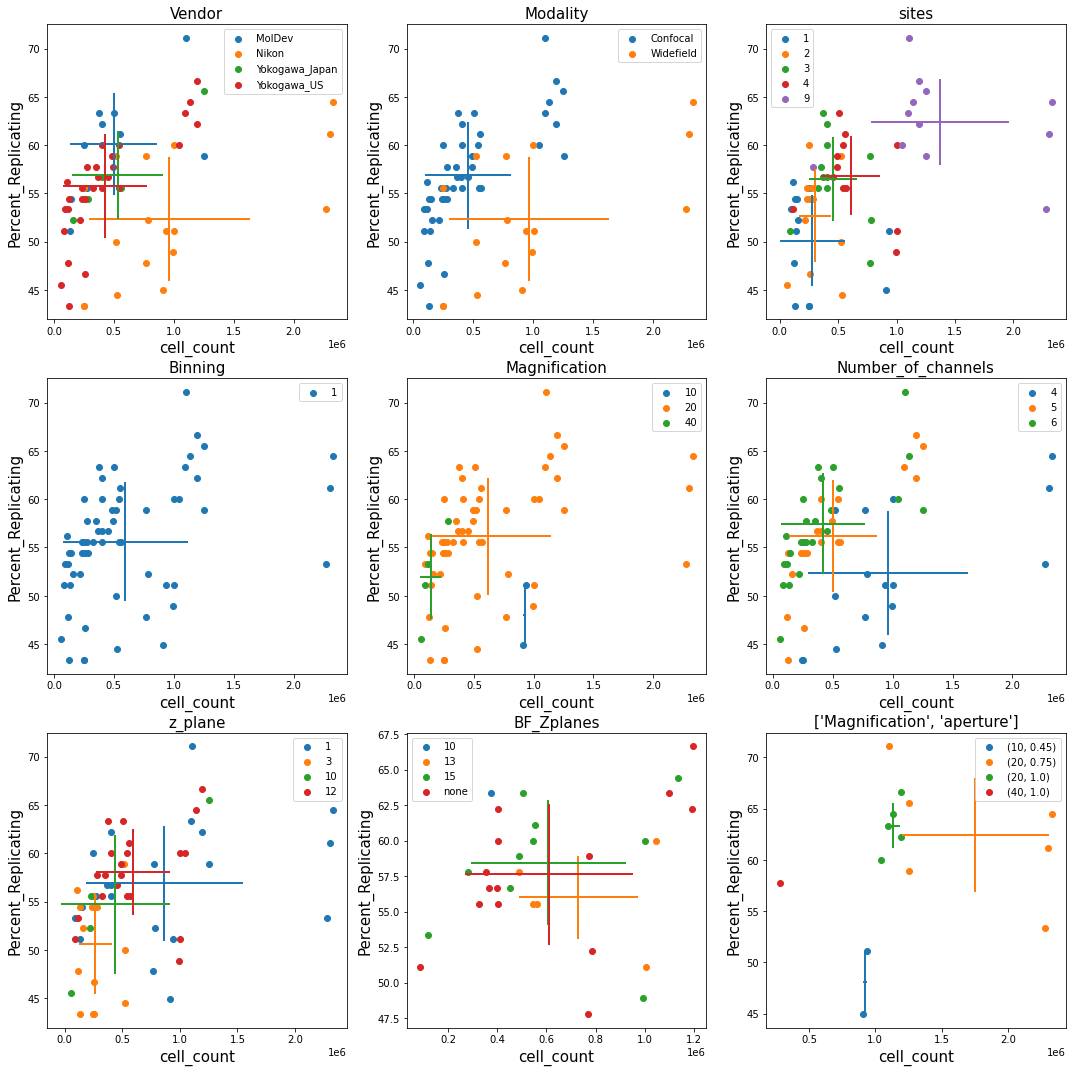

In [64]:
group_columns = ["Vendor", "Modality", "sites", 
                "Binning", "Magnification", "Number_of_channels", "z_plane", 
                "BF_Zplanes", ["Magnification", "aperture"]]
subplots = np.arange(len(group_columns)).reshape(-1,3).shape

plot_plates = match_rep_df[match_rep_df["sites"] == 9]["Assay_Plate_Barcode"].values

additional_cols = {
    "col1": ["cell_count", "Mean_Cell_Count", lambda x: np.mean(x)],
    "col2": ["cell_count", "SD_Cell_Count", lambda z: float('%.3f'%np.std(z))]
}

df_subset = match_rep_df[(match_rep_df["Assay_Plate_Barcode"].str.contains("|".join(plot_plates))) & 
                        (match_rep_df["sphering"] == True) 
                        ]

# group_df = utilssphering.find_group_avg_df(df_subset, "Vendor", add_cols=additional_cols)
# group_df

fig, ax = plt.subplots(subplots[0], subplots[1], figsize=(15,15))
for i, _ax in zip(group_columns, ax.flatten()):
    try:
        group_df = utilssphering.find_group_avg_df(df_subset, i, add_cols=additional_cols)
    except:
        print("Found ya None")
    try:
        utilssphering.group_plot(
            df=group_df, 
            x="Mean_Cell_Count", 
            y="Mean_Percent_Replicating",
            group=i,
            error_x="SD_Cell_Count",
            error_y="SD_Percent_Replicating",
            fig=fig,
            ax_=_ax
        )
        utilssphering.group_plot(df_subset, "cell_count", "Percent_Replicating", group=i, fig=fig, ax_=_ax, legend=True)
    except Exception as e:
        print(e)
        fig.delaxes(_ax)
fig.savefig("figures/rep_vs_cell-count-for-9site_and_subsamples_WITH_ERROR.png")


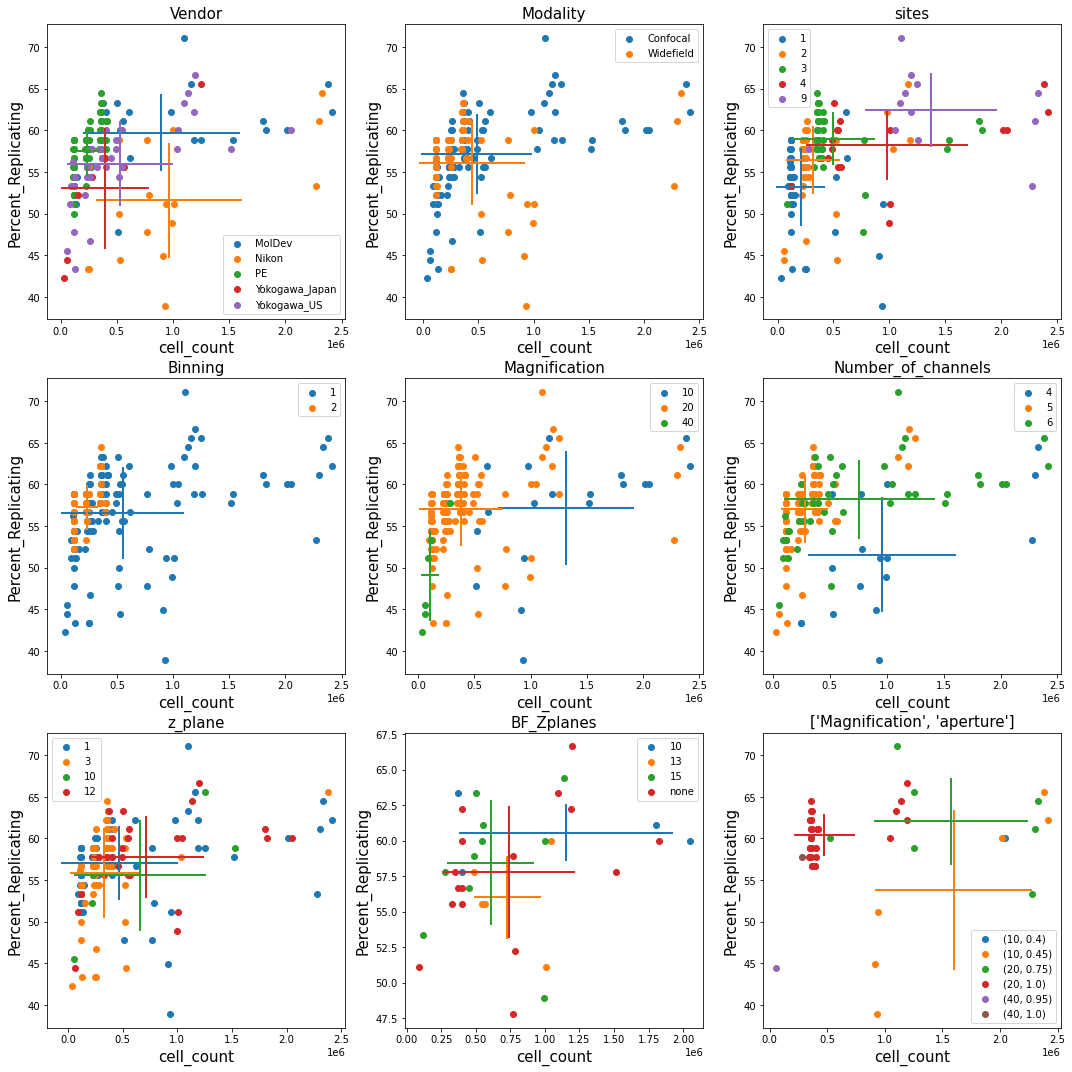

In [65]:
group_columns = ["Vendor", "Modality", "sites", 
                "Binning", "Magnification", "Number_of_channels", "z_plane", 
                "BF_Zplanes", ["Magnification", "aperture"]]
subplots = np.arange(len(group_columns)).reshape(-1,3).shape


additional_cols = {
    "col1": ["cell_count", "Mean_Cell_Count", lambda x: np.mean(x)],
    "col2": ["cell_count", "SD_Cell_Count", lambda z: float('%.3f'%np.std(z))]
}

df_subset = match_rep_df[
                        (match_rep_df["sphering"] == True) 
                        ]

# group_df = utilssphering.find_group_avg_df(df_subset, "Vendor", add_cols=additional_cols)
# group_df

fig, ax = plt.subplots(subplots[0], subplots[1], figsize=(15,15))
for i, _ax in zip(group_columns, ax.flatten()):
    try:
        group_df = utilssphering.find_group_avg_df(df_subset, i, add_cols=additional_cols)
    except:
        print("Found ya None")
    try:
        utilssphering.group_plot(
            df=group_df, 
            x="Mean_Cell_Count", 
            y="Mean_Percent_Replicating",
            group=i,
            error_x="SD_Cell_Count",
            error_y="SD_Percent_Replicating",
            fig=fig,
            ax_=_ax
        )
        utilssphering.group_plot(df_subset, "cell_count", "Percent_Replicating", group=i, fig=fig, ax_=_ax, legend=True)
    except Exception as e:
        print(e)
        fig.delaxes(_ax)
fig.savefig("figures/rep_vs_cell-count-for-all-samples_WITH_ERROR.png")


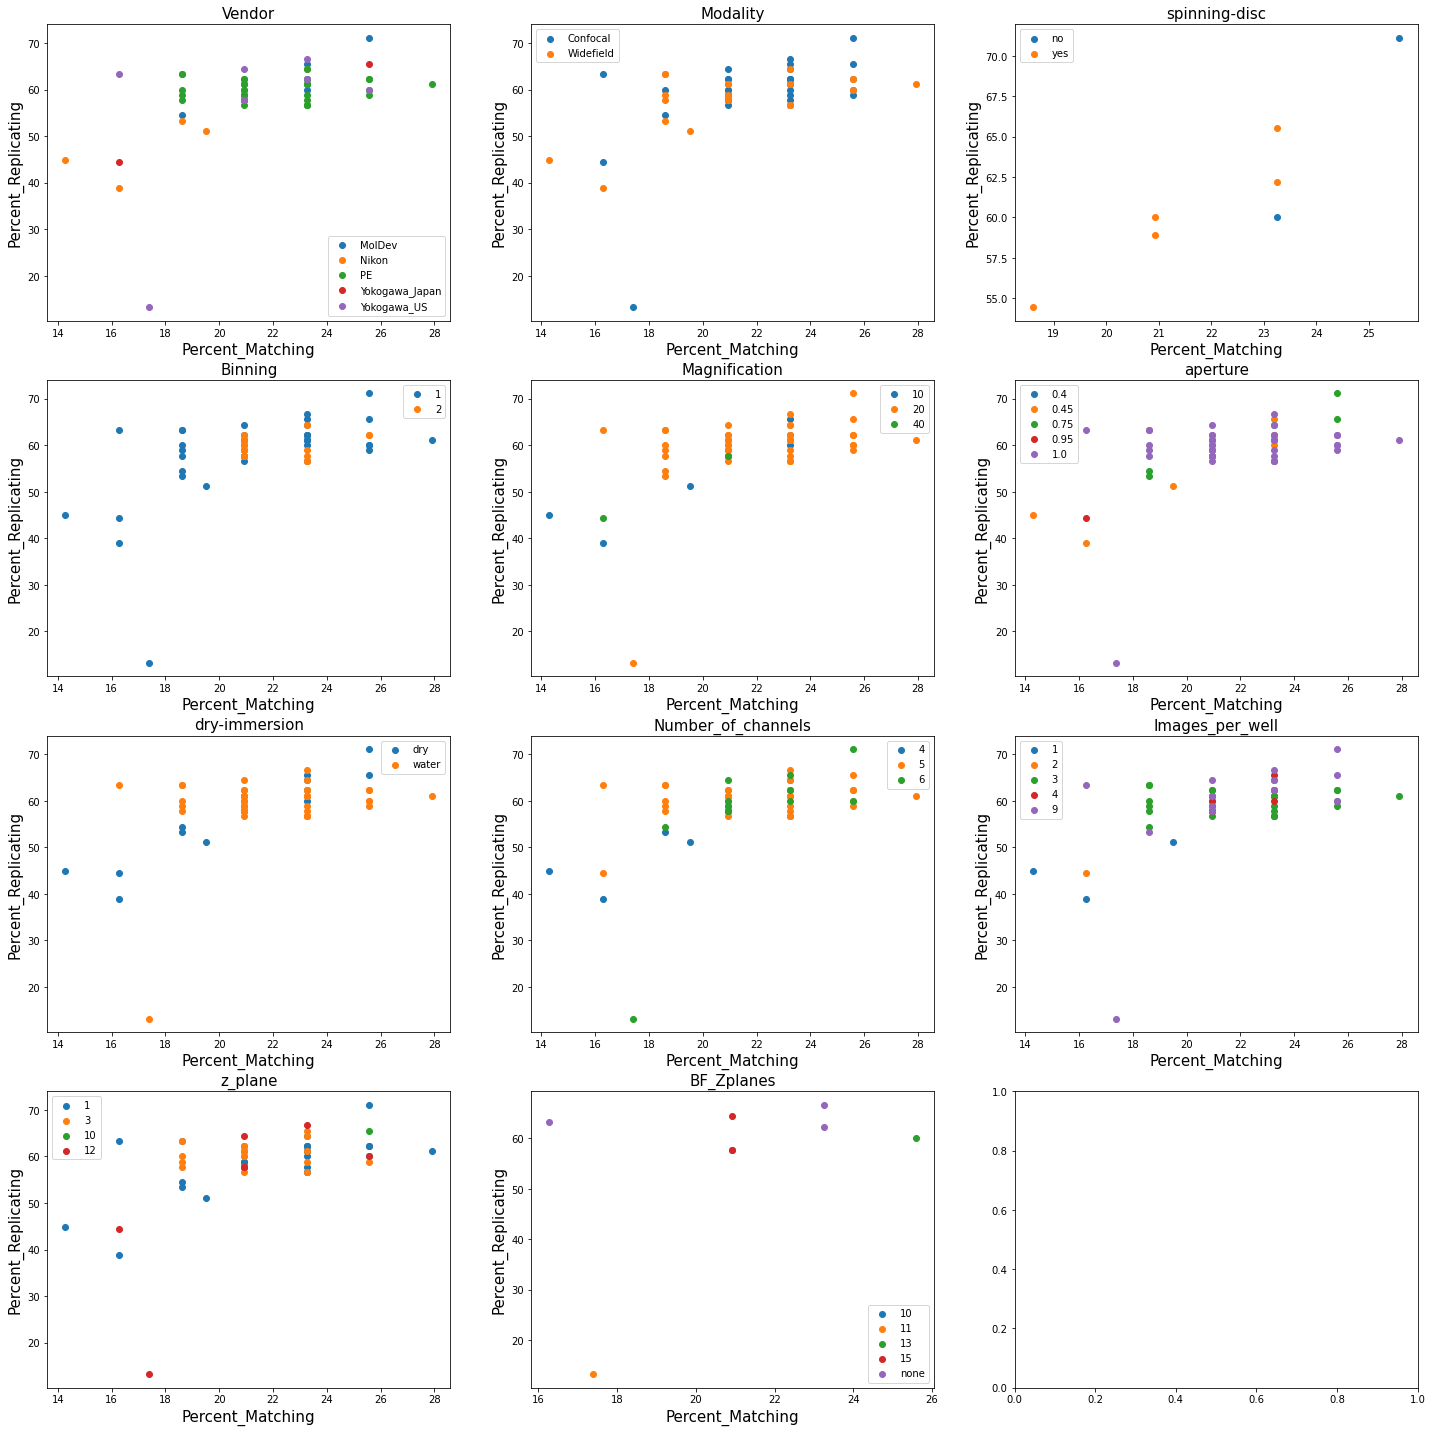

In [93]:
group_columns = ["Vendor", "Modality", "spinning-disc", "Binning", 
                "Magnification", "aperture", "dry-immersion",
                "Number_of_channels", "Images_per_well",
                "z_plane", "BF_Zplanes"]

df_subset = match_rep_df[(~match_rep_df["Batch"].str.contains("siteSubSample")) & (match_rep_df["sphering"] == True)]

fig, ax = plt.subplots(4,3, figsize=(20,20))
for i, _ax in zip(group_columns, ax.flatten()):
    utilssphering.group_plot(df_subset, "Percent_Matching", "Percent_Replicating", group=i, fig=fig, ax_=_ax)
# fig.savefig("figures/rep_vs_match_groupings_sphering_FALSE.png")


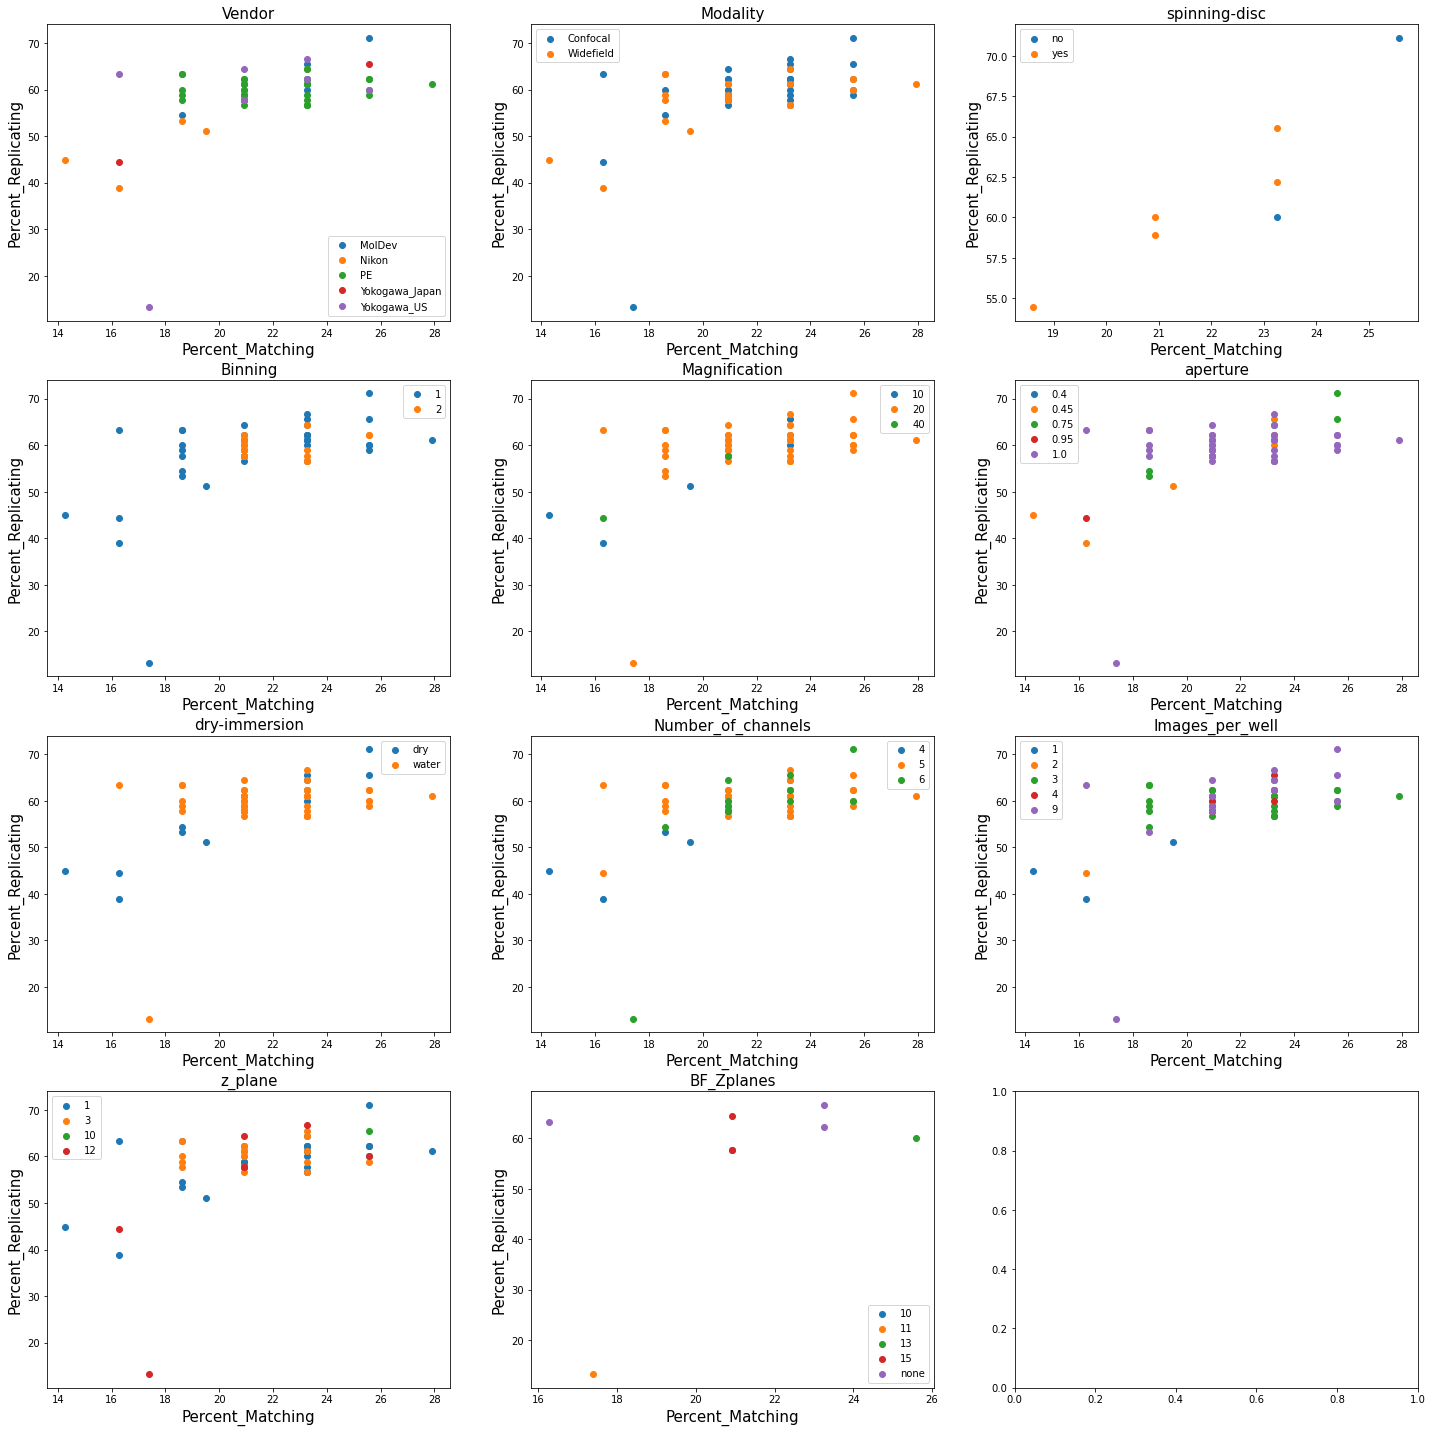

In [95]:
group_columns = ["Vendor", "Modality", "spinning-disc", "Binning", 
                "Magnification", "aperture", "dry-immersion",
                "Number_of_channels", "Images_per_well",
                "z_plane", "BF_Zplanes"]

df_subset = match_rep_df[(~match_rep_df["Batch"].str.contains("siteSubSample")) & (match_rep_df["sphering"] == True)]

fig, ax = plt.subplots(4,3, figsize=(20,20))
for i, _ax in zip(group_columns, ax.flatten()):
    utilssphering.group_plot(df_subset, "Percent_Matching", "Percent_Replicating", group=i, fig=fig, ax_=_ax)
# fig.savefig("figures/rep_vs_match_groupings_sphering_TRUE.png")

# Creating mean and SD columns for grouped DF

In [168]:


utilssphering.find_group_avg_df(match_rep_df.loc[match_rep_df["sphering"]==True], "Vendor")

,Percent_Replicating,Mean_Percent_Replicating,SD_Percent_Replicating,Percent_Matching,Mean_Percent_Matching,SD_Percent_Matching,Vendor
0,"[47.77777777777778, 56.66666666666666, 62.2222...",59.700855,4.649,"[18.6046511627907, 18.6046511627907, 20.930232...",19.856887,2.972,MolDev
1,"[55.55555555555556, 43.333333333333336, 43.333...",51.572356,6.952,"[16.27906976744186, 20.930232558139537, 13.953...",17.769135,2.587,Nikon
2,"[53.333333333333336, 54.44444444444444, 50.0, ...",57.461988,2.936,"[13.953488372093023, 18.6046511627907, 16.2790...",20.171359,3.209,PE
3,"[52.22222222222223, 42.22222222222222, 54.4444...",53.015873,7.267,"[20.930232558139537, 18.6046511627907, 23.2558...",21.594684,2.396,Yokogawa_Japan
4,"[54.44444444444444, 47.77777777777778, 43.3333...",55.978512,5.086,"[18.6046511627907, 16.27906976744186, 18.60465...",20.170140,2.731,Yokogawa_US


(5, 7)
(6, 8)
(5, 7)
(2, 7)
(3, 7)
(3, 7)
(4, 7)
(4, 7)
(5, 7)
(2, 7)
(2, 7)
(3, 7)
(2, 7)
(5, 7)
(6, 8)


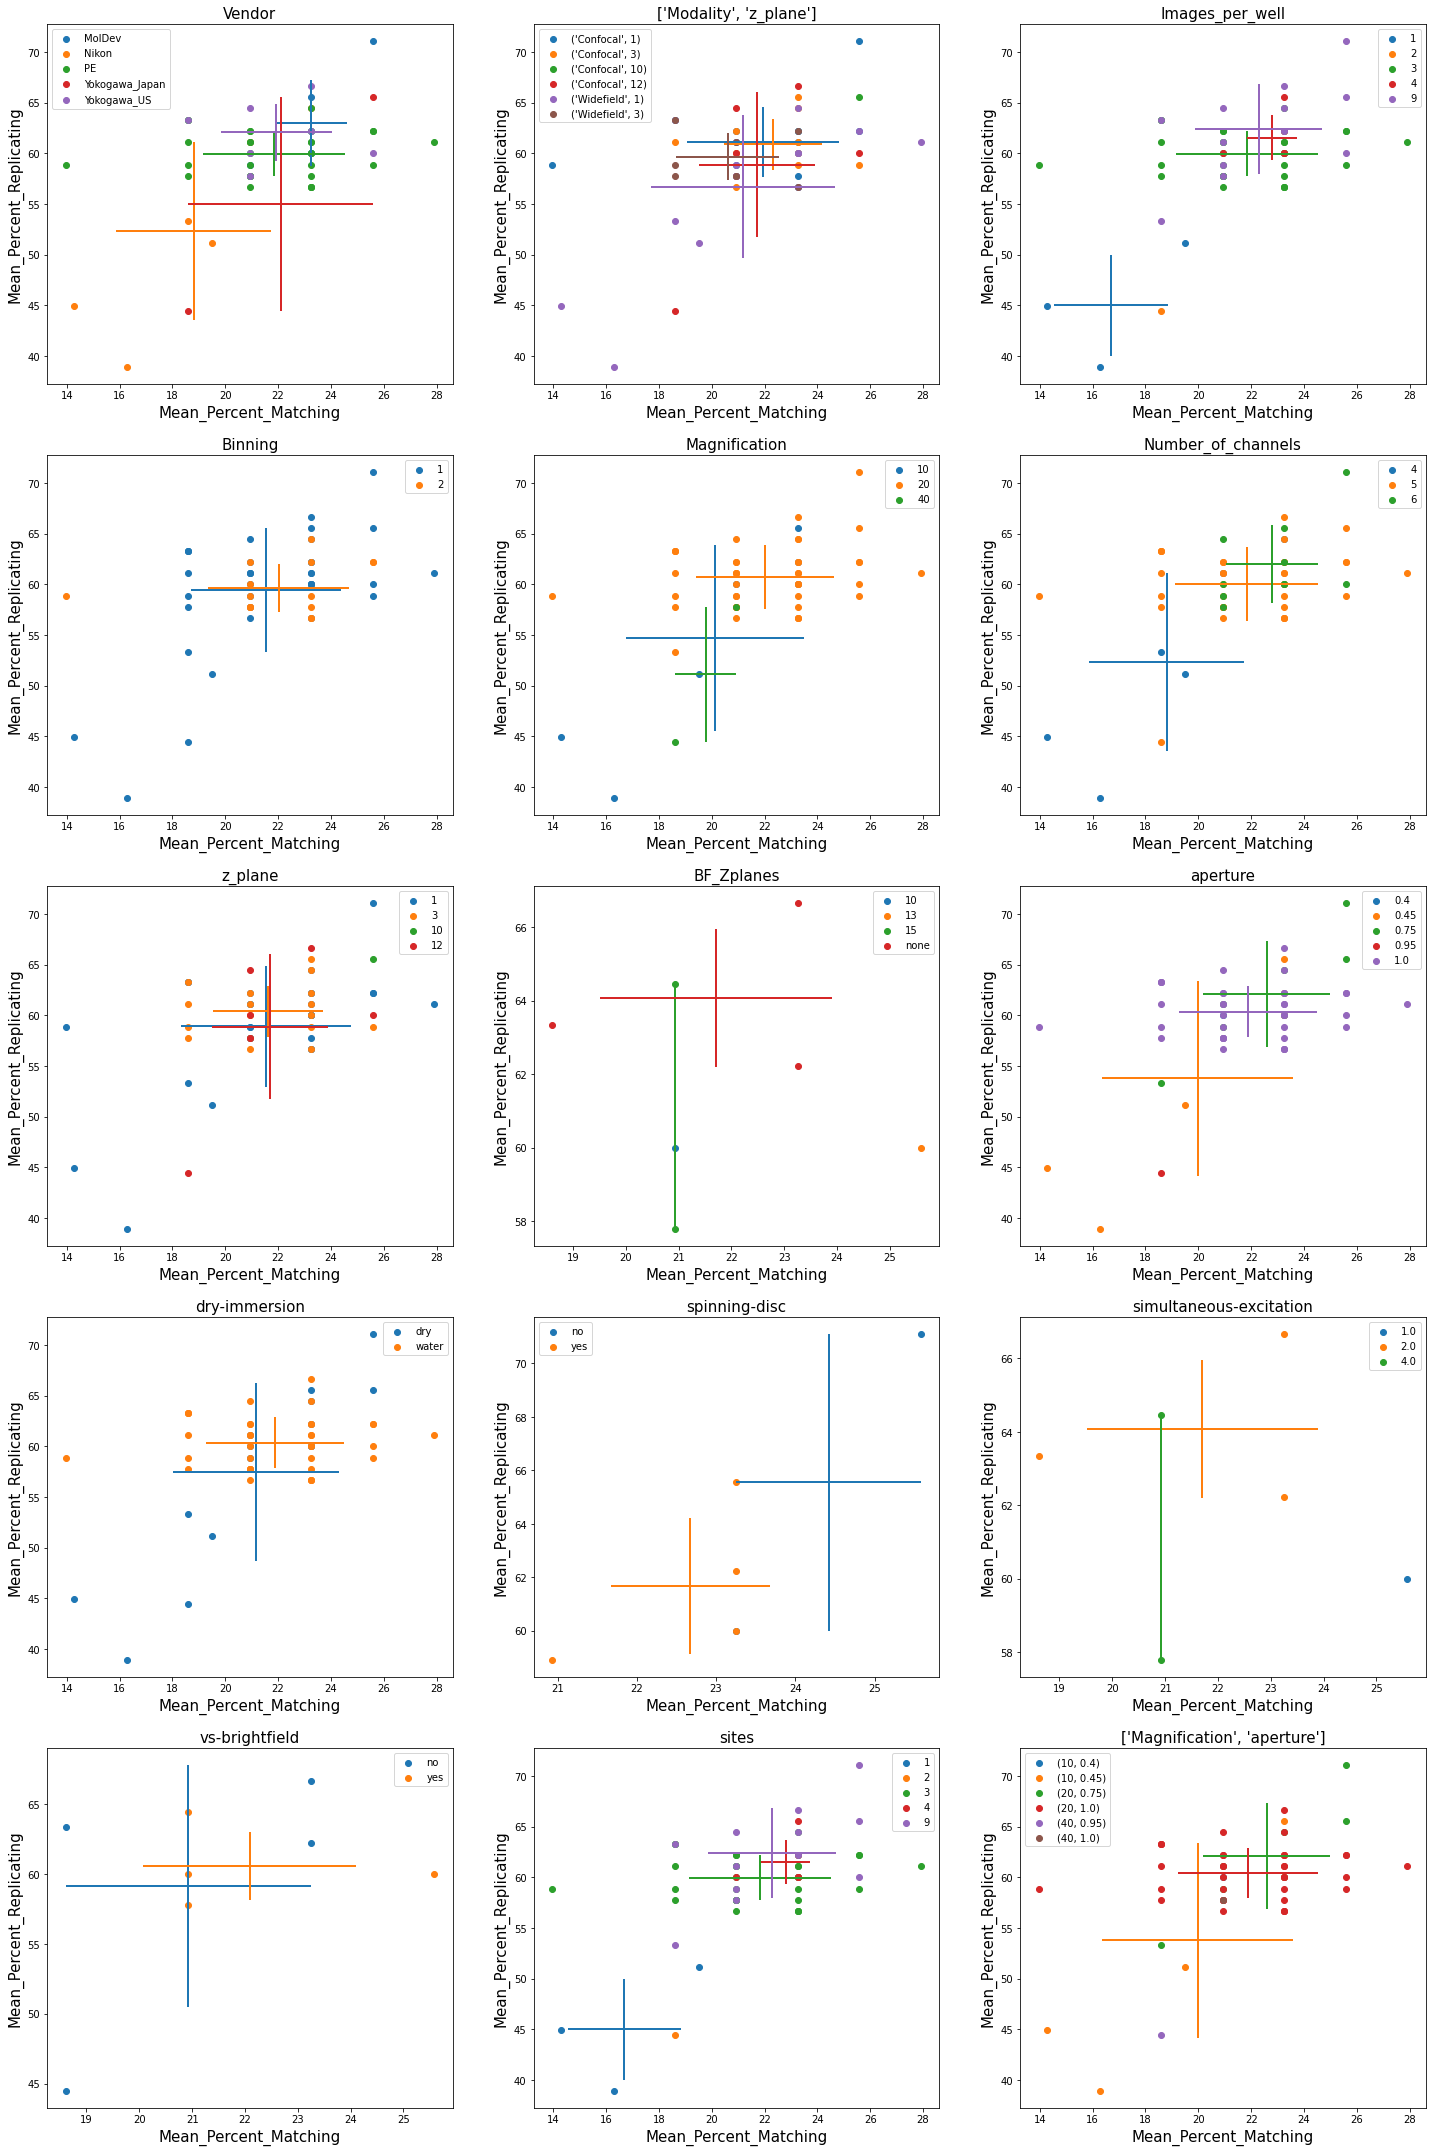

In [303]:
group_columns = ["Vendor", ["Modality", "z_plane"], "Images_per_well", 
                "Binning", "Magnification", "Number_of_channels", "z_plane", 
                "BF_Zplanes", "aperture", "dry-immersion", "spinning-disc", 
                "simultaneous-excitation", "vs-brightfield", "sites", ["Magnification", "aperture"]]

df_subset = match_rep_df[(~match_rep_df["Batch"].str.contains("siteSubSample")) & (match_rep_df["sphering"] == True)]

subplots = np.arange(len(group_columns)).reshape(-1,3).shape
fig, ax = plt.subplots(subplots[0], subplots[1], figsize=(20,30))
for i, _ax in zip(group_columns, ax.flatten()):
    try:
        group_df = utilssphering.find_group_avg_df(df_subset, i)
        print(group_df.shape)
        # Plot the scatter
        utilssphering.group_plot(
            df=df_subset,
            x="Percent_Matching", 
            y="Percent_Replicating",
            group=i,
            fig=fig,
            ax_=_ax,
            legend=True
        )
        # Plot the errorbars
        utilssphering.group_plot(
            df=group_df, 
            x="Mean_Percent_Matching", 
            y="Mean_Percent_Replicating",
            group=i,
            error_x="SD_Percent_Matching",
            error_y="SD_Percent_Replicating",
            fig=fig,
            ax_=_ax
        )
    except Exception as e:
        print(i, e)
        fig.delaxes(_ax)
        
fig.savefig("figures/mean-for-ALL-scope-groupings_sphering_TRUE.png")

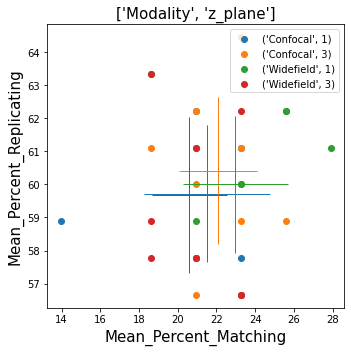

In [147]:
group_columns = [["Modality", "z_plane"], None, None]

df_subset = match_rep_df[(~match_rep_df["Batch"].str.contains("siteSubSample")) & 
                        (match_rep_df["sphering"] == True) 
                        # Drop the 10 z_plane data since there's only one
                        & (~match_rep_df["z_plane"].isin([10])) &
                        (match_rep_df["Vendor"].str.contains("PE"))]

subplots = np.arange(len(group_columns)).reshape(-1,3).shape
fig, ax = plt.subplots(subplots[0], subplots[1], figsize=(15,5))
for i, _ax in zip(group_columns, ax.flatten()):
    try:
        group_df = utilssphering.find_group_avg_df(df_subset, i)
        # Plot the scatter
        utilssphering.group_plot(
            df=df_subset,
            x="Percent_Matching", 
            y="Percent_Replicating",
            group=i,
            fig=fig,
            ax_=_ax,
            legend=True
        )
        # Plot the errorbars
        utilssphering.group_plot(
            df=group_df, 
            x="Mean_Percent_Matching", 
            y="Mean_Percent_Replicating",
            group=i,
            error_x="SD_Percent_Matching",
            error_y="SD_Percent_Replicating",
            fig=fig,
            ax_=_ax
        )

    except:
        fig.delaxes(_ax)
        
fig.savefig("figures/mean-for-modality_z-plane_PE_ONLY.png")

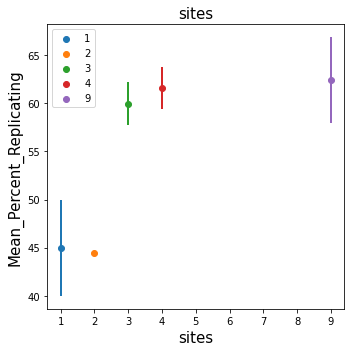

In [309]:
%autoreload 2
import utilssphering

group_columns = ["sites", None, None]

df_subset = match_rep_df[(~match_rep_df["Batch"].str.contains("siteSubSample")) & 
                        (match_rep_df["sphering"] == True) 
                        ]

subplots = np.arange(len(group_columns)).reshape(-1,3).shape
fig, ax = plt.subplots(subplots[0], subplots[1], figsize=(15,5))
for i, _ax in zip(group_columns, ax.flatten()):
    # group_df = utilssphering.find_group_avg_df(df_subset, i)
    # print(group_df)
    try:
        group_df = utilssphering.find_group_avg_df(df_subset, i)
        
        # Plot the scatter
        utilssphering.group_plot(
            df=group_df,
            x=i, 
            y="Mean_Percent_Replicating",
            group=i,
            fig=fig,
            ax_=_ax,
            legend=True
        )
        # Plot the errorbars
        utilssphering.group_plot(
            df=group_df, 
            x=i, 
            y="Mean_Percent_Replicating",
            group=i,
            # error_x="SD_Percent_Replicating",
            error_y="SD_Percent_Replicating",
            fig=fig,
            ax_=_ax
        )
    except:
        fig.delaxes(_ax)
        
# fig.savefig("figures/mean_rep-against-sites.png")

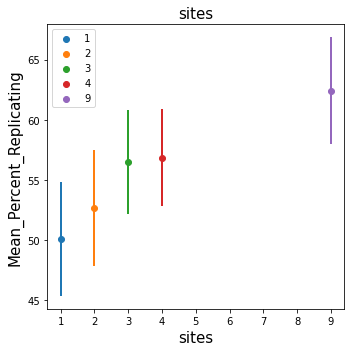

In [312]:
# Plot profile subsamples that originally had 9 images per well

# %autoreload 2
# import utilssphering

group_columns = ["sites", None, None]

plot_plates = ["Plate2_PCO_6ch_9site_20XPA",
                "Plate3_PCO_6ch_9site_20XPA_Crest",
                "BR00117061a",
                "BR00117062a",
                "BR00117063b",
                "20201021T092317",
                "BRO0117033_20xb",
                "BRO0117056_20x",
                "BRO0117056_20xb",
                "BRO0117059_20X",
                "BRO01177034_20x",
                "BRO0117059_40x"]

df_subset = match_rep_df[(match_rep_df["Assay_Plate_Barcode"].str.contains("|".join(plot_plates))) & 
                        (match_rep_df["sphering"] == True) 
                        ]

subplots = np.arange(len(group_columns)).reshape(-1,3).shape
fig, ax = plt.subplots(subplots[0], subplots[1], figsize=(15,5))
for i, _ax in zip(group_columns, ax.flatten()):
    try:
        group_df = utilssphering.find_group_avg_df(df_subset, i)
        # Plot the scatter
        utilssphering.group_plot(
            df=group_df,
            x=i, 
            y="Mean_Percent_Replicating",
            group=i,
            fig=fig,
            ax_=_ax,
            legend=True
        )
        # Plot the errorbars
        utilssphering.group_plot(
            df=group_df, 
            x=i, 
            y="Mean_Percent_Replicating",
            group=i,
            # error_x="SD_Percent_Replicating",
            error_y="SD_Percent_Replicating",
            fig=fig,
            ax_=_ax
        )
    except:
        fig.delaxes(_ax)
        
fig.savefig("figures/mean_rep-against-subsampled-sites(9-profiles-only).png")


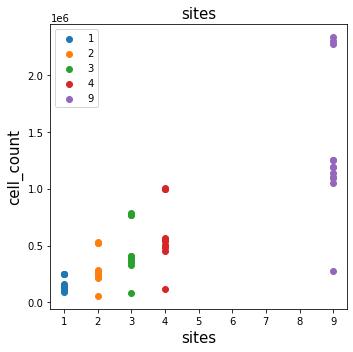

In [323]:
# Plot profile sites vs cell counts


group_columns = ["sites", None, None]

plot_plates = match_rep_df[match_rep_df["sites"] == 9]["Assay_Plate_Barcode"].values

# "\\b" sets a boundary on the word, ensuring that exact string matches are made and not substrings
df_subset = match_rep_df[(match_rep_df["Assay_Plate_Barcode"].str.contains("\\b|".join(plot_plates))) & 
                        (match_rep_df["sphering"] == True) 
                        ]

subplots = np.arange(len(group_columns)).reshape(-1,3).shape
fig, ax = plt.subplots(subplots[0], subplots[1], figsize=(15,5))
for i, _ax in zip(group_columns, ax.flatten()):
    try:
        group_df = utilssphering.find_group_avg_df(df_subset, i)
        # Plot the scatter
        utilssphering.group_plot(
            df=df_subset,
            x=i, 
            y="cell_count",
            group=i,
            fig=fig,
            ax_=_ax,
            legend=True
        )
        # # Plot the errorbars
        # utilssphering.group_plot(
        #     df=group_df, 
        #     x=i, 
        #     y="Mean_Percent_Replicating",
        #     group=i,
        #     # error_x="SD_Percent_Replicating",
        #     error_y="SD_Percent_Replicating",
        #     fig=fig,
        #     ax_=_ax
        # )
    except:
        fig.delaxes(_ax)
        
fig.savefig("figures/cell_count-vs-sites-for-subsampled-sites(9-profiles-only).png")

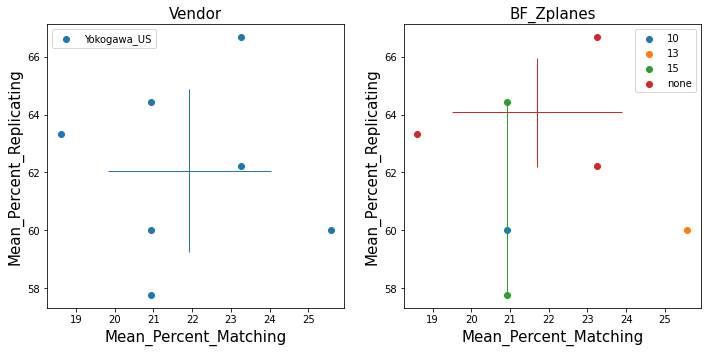

In [ ]:
# YokogawaUS brightfield z planes only (since these are the only true brightfield plots)
group_columns = ["Vendor", "BF_Zplanes", None]

df_subset = match_rep_df[(~match_rep_df["Batch"].str.contains("siteSubSample")) & 
                        (match_rep_df["sphering"] == True) &
                        # Drop the 10 z_plane data since there's only one
                        (match_rep_df["Vendor"].str.contains("Yokogawa_US"))]

subplots = np.arange(len(group_columns)).reshape(-1,3).shape
fig, ax = plt.subplots(subplots[0], subplots[1], figsize=(15,5))
for i, _ax in zip(group_columns, ax.flatten()):
    try:
        group_df = utilssphering.find_group_avg_df(df_subset, i)
        # Plot the scatter
        utilssphering.group_plot(
            df=df_subset,
            x="Percent_Matching", 
            y="Percent_Replicating",
            group=i,
            fig=fig,
            ax_=_ax,
            legend=True
        )
        # Plot the errorbars
        utilssphering.group_plot(
            df=group_df, 
            x="Mean_Percent_Matching", 
            y="Mean_Percent_Replicating",
            group=i,
            error_x="SD_Percent_Matching",
            error_y="SD_Percent_Replicating",
            fig=fig,
            ax_=_ax
        )

    except:
        fig.delaxes(_ax)
        
fig.savefig("figures/mean-for-brightfield-z-plane_YokogawaUS_ONLY.png")

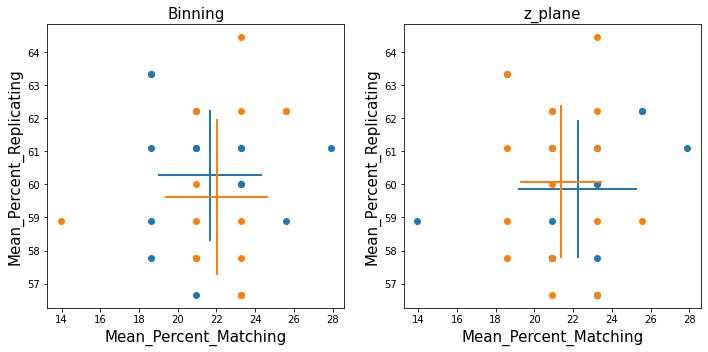

In [46]:
group_columns = ["Binning", "z_plane", "None"]

df_subset = match_rep_df[(~match_rep_df["Batch"].str.contains("siteSubSample")) & (match_rep_df["sphering"] == True) & (match_rep_df["Vendor"] == "PE")]

subplots = np.arange(len(group_columns)).reshape(-1,3).shape
fig, ax = plt.subplots(subplots[0], subplots[1], figsize=(15,5))
for i, _ax in zip(group_columns, ax.flatten()):
    try:
        group_df = utilssphering.find_group_avg_df(df_subset, i)
        utilssphering.group_plot(
            df=df_subset,
            x="Percent_Matching", 
            y="Percent_Replicating",
            group=i,
            fig=fig,
            ax_=_ax
        )
        utilssphering.group_plot(
            df=group_df, 
            x="Mean_Percent_Matching", 
            y="Mean_Percent_Replicating",
            group=i,
            error_x="SD_Percent_Matching",
            error_y="SD_Percent_Replicating",
            fig=fig, 
            ax_=_ax
        )
    except:
        fig.delaxes(_ax)

fig.savefig("figures/PE-binning-only_sphering_TRUE_PE_ONLY.png")

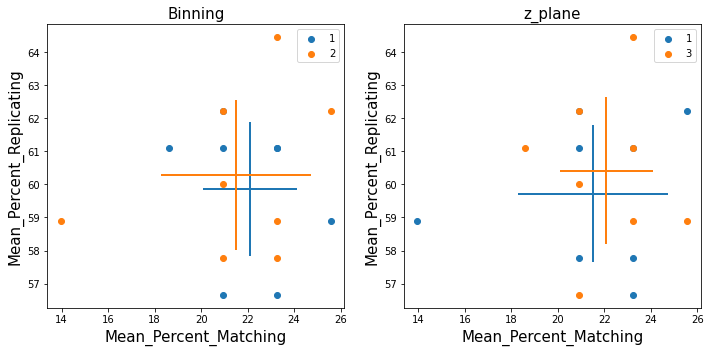

In [51]:
group_columns = ["Binning", "z_plane", None]

df_subset = match_rep_df[(~match_rep_df["Batch"].str.contains("siteSubSample")) & (match_rep_df["sphering"] == True) & (match_rep_df["Vendor"] == "PE") & (match_rep_df["Modality"] == "Confocal")]

subplots = np.arange(len(group_columns)).reshape(-1,3).shape
fig, ax = plt.subplots(subplots[0], subplots[1], figsize=(15,5))
for i, _ax in zip(group_columns, ax.flatten()):
    try:
        group_df = utilssphering.find_group_avg_df(df_subset, i)
        utilssphering.group_plot(
            df=df_subset,
            x="Percent_Matching", 
            y="Percent_Replicating",
            group=i,
            fig=fig,
            ax_=_ax,
            legend=True
        )
        utilssphering.group_plot(
            df=group_df, 
            x="Mean_Percent_Matching", 
            y="Mean_Percent_Replicating",
            group=i,
            error_x="SD_Percent_Matching",
            error_y="SD_Percent_Replicating",
            fig=fig, 
            ax_=_ax
        )
    except:
        fig.delaxes(_ax)
fig.savefig("figures/PE-binning-zplane_PE_ONLY_CONFOCAL.png")

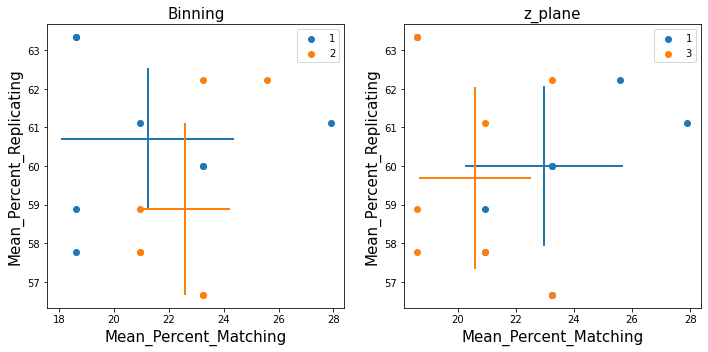

In [52]:
group_columns = ["Binning", "z_plane", None]

df_subset = match_rep_df[(~match_rep_df["Batch"].str.contains("siteSubSample")) & (match_rep_df["sphering"] == True) & (match_rep_df["Vendor"] == "PE") & (match_rep_df["Modality"] == "Widefield")]

subplots = np.arange(len(group_columns)).reshape(-1,3).shape
fig, ax = plt.subplots(subplots[0], subplots[1], figsize=(15,5))
for i, _ax in zip(group_columns, ax.flatten()):
    try:
        group_df = utilssphering.find_group_avg_df(df_subset, i)
        utilssphering.group_plot(
            df=df_subset,
            x="Percent_Matching", 
            y="Percent_Replicating",
            group=i,
            fig=fig,
            ax_=_ax,
            legend=True
        )
        utilssphering.group_plot(
            df=group_df, 
            x="Mean_Percent_Matching", 
            y="Mean_Percent_Replicating",
            group=i,
            error_x="SD_Percent_Matching",
            error_y="SD_Percent_Replicating",
            fig=fig, 
            ax_=_ax
        )
    except:
        fig.delaxes(_ax)
fig.savefig("figures/PE-binning-zplane_PE_ONLY_WIDEFIELD.png")

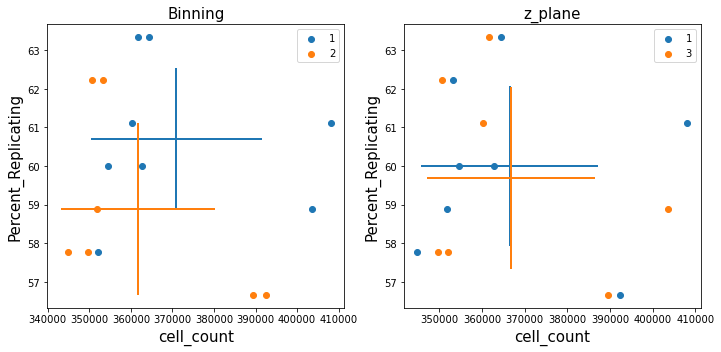

In [69]:
group_columns = ["Binning", "z_plane", None]

df_subset = match_rep_df[(~match_rep_df["Batch"].str.contains("siteSubSample")) & (match_rep_df["sphering"] == True) & (match_rep_df["Vendor"] == "PE") & (match_rep_df["Modality"] == "Widefield")]

additional_cols = {
    "col1": ["cell_count", "Mean_Cell_Count", lambda x: np.mean(x)],
    "col2": ["cell_count", "SD_Cell_Count", lambda z: float('%.3f'%np.std(z))]
}

subplots = np.arange(len(group_columns)).reshape(-1,3).shape
fig, ax = plt.subplots(subplots[0], subplots[1], figsize=(15,5))
for i, _ax in zip(group_columns, ax.flatten()):
    try:
        group_df = utilssphering.find_group_avg_df(df_subset, i, add_cols=additional_cols)
        utilssphering.group_plot(
            df=group_df, 
            x="Mean_Cell_Count", 
            y="Mean_Percent_Replicating",
            group=i,
            error_x="SD_Cell_Count",
            error_y="SD_Percent_Replicating",
            fig=fig, 
            ax_=_ax
        )
        utilssphering.group_plot(
            df=df_subset,
            x="cell_count", 
            y="Percent_Replicating",
            group=i,
            fig=fig,
            ax_=_ax,
            legend=True
        )

    except:
        fig.delaxes(_ax)
# fig.savefig("figures/PE-binning-zplane_PE_ONLY_WIDEFIELD.png")

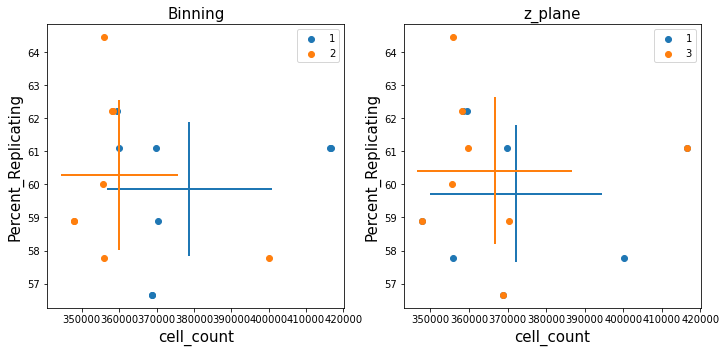

In [70]:
group_columns = ["Binning", "z_plane", None]

df_subset = match_rep_df[(~match_rep_df["Batch"].str.contains("siteSubSample")) & (match_rep_df["sphering"] == True) & (match_rep_df["Vendor"] == "PE") & (match_rep_df["Modality"] == "Confocal")]

additional_cols = {
    "col1": ["cell_count", "Mean_Cell_Count", lambda x: np.mean(x)],
    "col2": ["cell_count", "SD_Cell_Count", lambda z: float('%.3f'%np.std(z))]
}

subplots = np.arange(len(group_columns)).reshape(-1,3).shape
fig, ax = plt.subplots(subplots[0], subplots[1], figsize=(15,5))
for i, _ax in zip(group_columns, ax.flatten()):
    try:
        group_df = utilssphering.find_group_avg_df(df_subset, i, add_cols=additional_cols)
        utilssphering.group_plot(
            df=group_df, 
            x="Mean_Cell_Count", 
            y="Mean_Percent_Replicating",
            group=i,
            error_x="SD_Cell_Count",
            error_y="SD_Percent_Replicating",
            fig=fig, 
            ax_=_ax
        )
        utilssphering.group_plot(
            df=df_subset,
            x="cell_count", 
            y="Percent_Replicating",
            group=i,
            fig=fig,
            ax_=_ax,
            legend=True
        )

    except:
        fig.delaxes(_ax)
# fig.savefig("figures/PE-binning-zplane_PE_ONLY_WIDEFIELD.png")

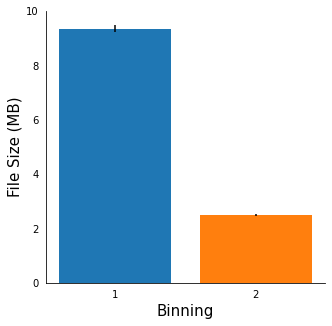

In [85]:
df_subset = match_rep_df[(~match_rep_df["Batch"].str.contains("siteSubSample")) & (match_rep_df["sphering"] == True) & (match_rep_df["Vendor"] == "PE")]

additional_cols = {
    "col1": ["Size_MB", "Mean_Size_MB", lambda x: np.mean(x)],
    "col2": ["Size_MB", "std_Size_MB", lambda z: float('%.3f'%np.std(z))]
}
group_df = utilssphering.find_group_avg_df(df_subset, "Binning", add_cols=additional_cols)
group_df

cmap = plt.cm.tab10
colour_palette = list()
for i in range(cmap.N):
    colour_palette.append(cmap(i))

fig, ax = plt.subplots(figsize=(5,5))
ax.bar(group_df["Binning"], group_df["Mean_Size_MB"], yerr=group_df["std_Size_MB"], color=[colour_palette[0], colour_palette[1]])
ax.set_xticks(group_df["Binning"], group_df["Binning"])
ax.set_xlabel("Binning", fontsize=15)
ax.set_ylabel("File Size (MB)", fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(axis="both", which="both", bottom=False, left=False)
ax.yaxis.set_ticks(np.arange(0, 11, 2))
fig.set_facecolor("white")

# fig.savefig("figures/file-size-comparison-for-1-2-binning-PE_ONLY.png")

In [51]:
d = {"col1": ["Size_MB", "Mean_Size_MB", lambda x: np.mean(x)]}
for i in d.values():
    print(i[0])

Size_MB


In [30]:

df_subset["Size_MB"]
# group_df = utilssphering.find_group_avg_df(df_subset, "Binning")

# fig, 

280    9.526377
282    9.484644
284    9.352902
286    9.587195
288    9.427739
290    9.400030
292    9.294915
294    9.473822
296    9.361273
298    9.244346
300    9.078627
302    9.285376
304    9.352244
306    9.264655
308    9.139749
310    9.294386
312    2.527899
314    2.511724
316    2.496831
318    2.539198
320    2.469309
322    2.456927
324    2.444871
326    2.477545
328    2.519742
330    2.484223
332    2.449872
334    2.488858
336    2.446371
338    2.420490
340    2.449473
Name: Size_MB, dtype: float64

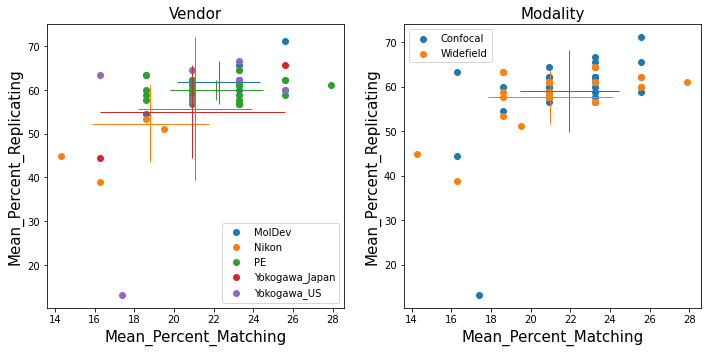

In [ ]:
group_columns = ["Vendor", "Modality", None]

df_subset = match_rep_df[(~match_rep_df["Batch"].str.contains("siteSubSample")) & (match_rep_df["sphering"] == True)]

subplots = np.arange(len(group_columns)).reshape(-1,3).shape
fig, ax = plt.subplots(subplots[0], subplots[1], figsize=(15,5))
for i, _ax in zip(group_columns, ax.flatten()):
    try:
        group_df = utilssphering.find_group_avg_df(df_subset, i)
        utilssphering.group_plot(
            df=df_subset,
            x="Percent_Matching", 
            y="Percent_Replicating",
            group=i,
            fig=fig,
            ax_=_ax
        )
        utilssphering.group_plot(
            df=group_df, 
            x="Mean_Percent_Matching", 
            y="Mean_Percent_Replicating",
            group=i,
            error_x="SD_Percent_Matching",
            error_y="SD_Percent_Replicating",
            fig=fig, 
            ax_=_ax
        )
    except:
        fig.delaxes(_ax)
# fig.savefig("figures/modality-only_sphering_TRUE.png")